In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-24,292.200012,297.109985,276.049988,296.369995,293.618713,85731500
1,2022-01-25,291.519989,294.989990,285.170013,288.489990,285.811859,72848600
2,2022-01-26,307.989990,308.500000,293.029999,296.709991,293.955566,90428900
3,2022-01-27,302.660004,307.299988,297.929993,299.839996,297.056549,53481300
4,2022-01-28,300.230011,308.480011,294.450012,308.260010,305.398407,49743700


In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

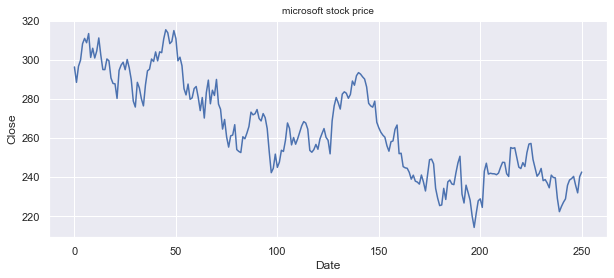

In [4]:
sns.set()
plt.style.context('Solarize_Light2')
plt.figure(figsize=(10,4))
plt.title("microsoft stock price", fontsize=10)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data['Close'])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.993595  0.992578  0.980760   0.979936  0.100232
High       0.993595  1.000000  0.992629  0.992072   0.991135  0.128508
Low        0.992578  0.992629  1.000000  0.991503   0.991429  0.054169
Close      0.980760  0.992072  0.991503  1.000000   0.999830  0.090877
Adj Close  0.979936  0.991135  0.991429  0.999830   1.000000  0.083190
Volume     0.100232  0.128508  0.054169  0.090877   0.083190  1.000000


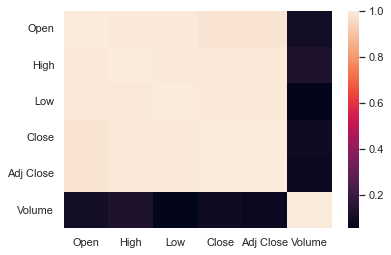

In [5]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [6]:
x=data[['Open','High','Low']]
y=data['Close']
x=x.to_numpy()
y=y.to_numpy()
y=y.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [8]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
score

0.9709853900894087

In [9]:

data=pd.DataFrame(data={"Predicted Rate": y_pred})
data.head()

,Predicted Rate
0,253.139999
1,310.700012
2,241.729996
3,286.149994
4,267.660004


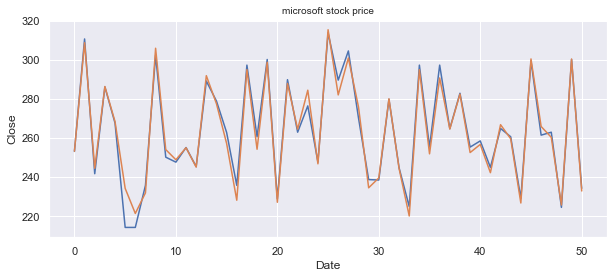

In [10]:
sns.set()
plt.style.context('Solarize_Light2')
plt.figure(figsize=(10,4))
plt.title("microsoft stock price", fontsize=10)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data)
plt.plot(y_test)
plt.show()
